In [1]:
import math
import json
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import sys
sys.path.append("../")

from unique_hypercube_size import *

%load_ext autoreload
%autoreload 2


In [2]:
"""

    Run the experiments and 
    collect the data
    
"""

m_max = 6
k_max = 6
num_trials = 10
ms = range(1, m_max + 1)
ks = range(1, k_max + 1)



scale_type = "exp"
scales = np.sqrt(2)**np.arange(m_max)

# scale_type = "uni_mu"
# scales = np.ones(m_max)*np.mean(scales) + np.random.sample(m_max)*0.2
print "scales", scales


exp_folder = "../results"
exp_tag = "{}_m{}_k{}_t{}".format(scale_type, m_max, k_max, num_trials)

results_by_params = defaultdict(list)

for _ in xrange(num_trials):
    A, results = doRandomModuleExperiment(ms, ks, scales)
    for params, v in results.iteritems():
        results_by_params[params].append(v)
        
rad = np.zeros((m_max, k_max, num_trials))
for (m,k), vs in results_by_params.iteritems():
    rad[m-1,k-1] = np.array(vs)


scales [ 1.          1.41421356  2.          2.82842712  4.          5.65685425]


In [20]:
"""

    Compute the volumes 
    from data
    
"""

bins_per_axis = 10

vol = np.zeros((m_max, k_max, num_trials))
codes = np.zeros((m_max, k_max))
mean_rad = np.zeros((m_max, k_max))
mean_vol = np.zeros((m_max, k_max))

for m in range(m_max):
    for k in range(m_max):
        vol[m,k] = (2.*rad[m,k])**(k+1)
        mean_rad[m,k] = np.mean(rad[m,k])
        mean_vol[m,k] = np.mean(vol[m,k])
        codes[m,k] = mean_vol[m,k]*(bins_per_axis**k)

        

In [16]:
"""
    
    Compute the volumes for the 
    modules-per-axis strategy
    
"""

inferred_vol = np.zeros((m_max,k_max))

for m in ms:
    m_ = m - 1
    for k in ks:
        k_  = k - 1
        mx  = float(m)/float(k)
        m0 = 2
        m1 = 3
        r0 = mean_rad[m0, 0]
        r1 = mean_rad[m1, 0]

        offset = m0 + 1.
        slope  = (np.log10(r1) - np.log10(r0))/(float(m1)-float(m0))
        base   = np.log10(r0)
        
        rx = 10**(base + (mx - offset)*slope)
        vx = rx**k
        inferred_vol[m_,k_] = vx




In [9]:


filename = "{}/data_dict_{}.p".format(exp_folder, exp_tag)

with open(filename,'wb') as f:
    pickle.dump({
        "rad": rad,
        "vol": vol,
        "inferred_vol": inferred_vol,
        "mean_rad": mean_rad,
        "mean_vol": mean_vol
    }, f)

# Create Graphs

In [10]:
"""

    Plot and/or save the graphs
    
"""




exp_folder = "../results"
exp_tag = "{}_m{}_k{}_t{}".format("exp", m_max, k_max, num_trials)
filename = "{}/data_dict_{}.p".format(exp_folder, exp_tag)
with open(filename,'r') as f:
    data_exp_scales = pickle.load(f)

exp_folder = "../results"
exp_tag = "{}_m{}_k{}_t{}".format("uni_mu", m_max, k_max, num_trials)
filename = "{}/data_dict_{}.p".format(exp_folder, exp_tag)
with open(filename,'r') as f:
    data_uni_scales = pickle.load(f)
    
    

fig, ax = plt.subplots(1,m_max, sharey=False, figsize=(20,5))

for i in range(k_max):
    ax[i].set_yscale("log")
    ax[i].set_xlabel("m")
    ax[i].set_ylabel("vol")
    ax[i].set_xticks(ms)
    ax[i].plot(ms, data_exp_scales["inferred_vol"][:, i], 
               marker=".", 
               linestyle=":",
               c="gray",
               label="Inferred".format(i+1))
    
    ax[i].plot(ms, data_uni_scales["mean_vol"][:, i], 
               marker="o", 
               c="C1",
#                markeredgecolor="white",
               label="Data (unif. scales)".format(i+1))
    
    ax[i].plot(ms, data_exp_scales["mean_vol"][:,i],
               marker="o", 
               c="C0",
#                markeredgecolor="white",
               label="Data (exp. scales)".format(i+1))

    ax[i].set_title("$k={}$".format(i + 1))
    ax[i].legend()

plt.tight_layout()
filename = "{}/capacity_graph_{}.png".format(exp_folder, exp_tag)
plt.savefig(filename)
plt.show()


fig, ax = plt.subplots(1,m_max, sharey=False, figsize=(20,5))

for i in range(k_max):
    ax[i].set_yscale("log")
    ax[i].set_xlabel("m")
    ax[i].set_ylabel("vol")
    ax[i].set_xticks(ms)
    ax[i].plot(ms, data_exp_scales["inferred_vol"][:, i], 
               marker=".", 
               linestyle=":",
               c="gray",
               label="Inferred".format(i+1))
    
    ax[i].plot(ms, data_exp_scales["mean_vol"][:,i],
               marker="o", 
#                markeredgecolor="white",
               label="Data (exp. scales)".format(i+1))

    ax[i].set_title("$k={}$".format(i + 1))
    ax[i].legend()

plt.tight_layout()
filename = "{}/capacity_graph_{}.png".format(exp_folder, exp_tag)
plt.savefig(filename)
plt.show()



fig, ax = plt.subplots(1,m_max, sharey=True, figsize=(20,5))

for i in range(k_max):
    ax[i].set_yscale("log")
    ax[i].set_xlabel("m")
    ax[i].set_ylabel("vol")
    ax[i].set_xticks(ms)
    ax[i].plot(ms, inferred_vol[:, i], 
               marker=".", 
               linestyle=":",
               c="gray",
               label="Inferred".format(i+1))
    ax[i].plot(ms, mean_vol[:, i], 
               marker="o", 

               label="$Data$".format(i+1))

    ax[i].set_title("$k={}$".format(i + 1))
    ax[i].legend()
    
plt.show()





IOError: [Errno 2] No such file or directory: '../results/data_dict_uni_mu_m6_k6_t10.p'

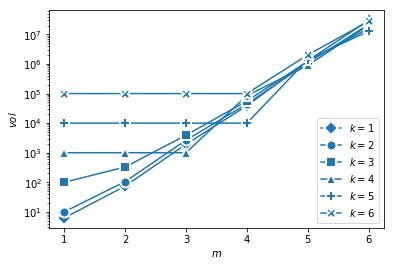

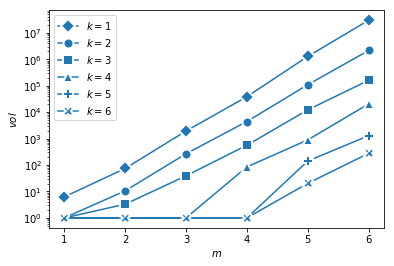

In [21]:
marker = ["X", "P", "^", "s", "o", "D"][::-1]

plt.yscale("log")
plt.xticks(ms)
plt.xlabel("$m$")
plt.ylabel("$vol$")
for i in range(k_max):
    plt.plot(ms, codes[:, i], 
             marker=marker[i], 
             c="C0", 
             markeredgewidth=2,
             markersize=10,
#              linewidth=1 + (i-1)*0.4,
             markeredgecolor="white",
             label="$k={}$".format(i+1))
plt.legend()
plt.show()

marker = ["X", "P", "^", "s", "o", "D"][::-1]

plt.yscale("log")
plt.xticks(ms)
plt.xlabel("$m$")
plt.ylabel("$vol$")
for i in range(k_max):
    plt.plot(ms, mean_vol[:, i], 
             marker=marker[i], 
             c="C0", 
             markeredgewidth=2,
             markersize=10,
#              linewidth=1 + (i-1)*0.4,
             markeredgecolor="white",
             label="$k={}$".format(i+1))
plt.legend()
plt.show()
